# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import random

apartment_data = pd.read_csv('/datasets/real_estate_data_us.csv',sep='\t')

apartment_data.info()
apartment_data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null object
days_listed          20518 non-null float64
last_price           23699 non-null float64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            12180 non-null float64
ceiling_height       14504 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         2775 non-null object
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            9110 no

date_posted          23699
days_listed          20518
last_price           23699
bedrooms             23699
kitchen_area         21421
living_area          21796
total_area           23699
balconies            12180
ceiling_height       14504
floors_total         23613
floor                23699
total_images         23699
bike_parking          2775
is_studio            23699
is_open_plan         23699
locality_name        23650
airport_dist         18157
city_center_dist     18180
park_dist             8079
parks_within_3000    18181
pond_dist             9110
ponds_within_3000    18181
dtype: int64

### Conclusion

Dataframe - apartment_data
INFO - 
Many datatypes are float, can be changed to int
bikeparking should be bool

COUNT - 
23699 records
Many columns are complete - date_posted, last_price, bedrooms, total_area, floor, total_images, is_open_plan, is_studio
Rest of the columns - many values na/Nan, they need to be filled with values or 0s.


### Step 2. Data preprocessing

In [62]:
apartment_data.describe()# to check the max, min, median of all columns so that we can replace NaNs appropriately

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
count,20518.000000,2.369900e+04,23699.000000,21421.000000,21796.000000,23699.000000,12180.000000,14504.000000,23613.000000,23699.000000,23699.000000,18157.000000,18180.000000,8079.000000,18181.000000,9110.000000,18181.000000
mean,180.888634,1.308310e+05,2.070636,10.569807,34.457852,60.348651,1.150082,2.771499,10.673824,5.892358,9.858475,28793.672193,14191.277833,490.804555,0.611408,517.980900,0.770255
std,219.727988,2.177403e+05,1.078405,5.905438,22.030445,35.654083,1.071300,1.261056,6.597173,4.885249,5.682529,12630.880622,8608.386210,342.317995,0.802074,277.720643,0.938346
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,181.000000,1.000000,0.000000,13.000000,0.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.520000,5.000000,2.000000,6.000000,18585.000000,9238.000000,288.000000,0.000000,294.000000,0.000000
50%,95.000000,9.300000e+04,2.000000,9.100000,30.000000,52.000000,1.000000,2.650000,9.000000,4.000000,9.000000,26726.000000,13098.500000,455.000000,0.000000,502.000000,1.000000
75%,232.000000,1.360000e+05,3.000000,12.000000,42.300000,69.900000,2.000000,2.800000,16.000000,8.000000,14.000000,37273.000000,16293.000000,612.000000,1.000000,729.000000,1.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,50.000000,84869.000000,65968.000000,3190.000000,3.000000,1344.000000,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f919f8bec50>]],
      dtype=object)

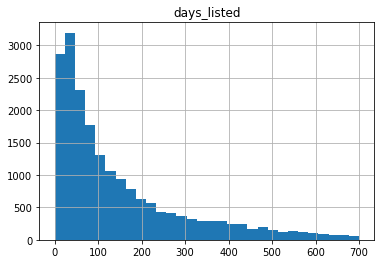

In [63]:
apartment_data.hist(column=['days_listed'],bins=30,range=(0,700))

In [64]:
#based on the describe(), I am using the following substitutions for NaN values. 
#values = {'parks_within_3000':0,'ponds_within_3000':0,'balconies':0}
values = {'bike_parking': False,'parks_within_3000':0,'ponds_within_3000':0,'balconies':0}
apartment_data.fillna(value=values, inplace = True) 

apartment_data['floors_total'].fillna (apartment_data['floor'], inplace = True)
apartment_data['locality_name'].fillna (method='ffill', inplace = True)


apartment_data['days_listed'].fillna(apartment_data['days_listed'].median(), inplace = True)
apartment_data['ceiling_height'].fillna (apartment_data['ceiling_height'].median(), inplace = True)
apartment_data['airport_dist'].fillna (apartment_data['airport_dist'].mean(), inplace = True)
apartment_data['city_center_dist'].fillna (apartment_data['city_center_dist'].mean(), inplace = True)
apartment_data['park_dist'].fillna (apartment_data['park_dist'].mean(), inplace = True)
apartment_data['pond_dist'].fillna (apartment_data['pond_dist'].mean(), inplace = True)

#Since kitchen is usually 1/4th of the total_area, and living area is usually 1/3 of the total_area, 
#I had used the following. However its better to leave those as Nan because I don't think they are going to 
#impact the last_price
#apartment_data['kitchen_area'].fillna(apartment_data['total_area']/4, inplace = True)
#apartment_data['living_area'].fillna (apartment_data['total_area']/3, inplace = True)

apartment_data.count()

date_posted          23699
days_listed          23699
last_price           23699
bedrooms             23699
kitchen_area         21421
living_area          21796
total_area           23699
balconies            23699
ceiling_height       23699
floors_total         23699
floor                23699
total_images         23699
bike_parking         23699
is_studio            23699
is_open_plan         23699
locality_name        23699
airport_dist         23699
city_center_dist     23699
park_dist            23699
parks_within_3000    23699
pond_dist            23699
ponds_within_3000    23699
dtype: int64

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
count,23699.000000,2.369900e+04,23699.000000,21421.000000,21796.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,169.360226,1.308310e+05,2.070636,10.569807,34.457852,60.348651,0.591080,2.724358,10.671463,5.892358,9.858475,28793.672193,14191.277833,490.804555,0.469049,517.980900,0.590911
std,206.535633,2.177403e+05,1.078405,5.905438,22.030445,35.654083,0.959298,0.988298,6.595802,4.885249,5.682529,11055.741355,7539.644870,199.859965,0.748534,172.181967,0.883999
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,181.000000,1.000000,0.000000,13.000000,0.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.600000,5.000000,2.000000,6.000000,21183.000000,10927.000000,490.804555,0.000000,517.980900,0.000000
50%,95.000000,9.300000e+04,2.000000,9.100000,30.000000,52.000000,0.000000,2.650000,9.000000,4.000000,9.000000,28793.672193,14191.277833,490.804555,0.000000,517.980900,0.000000
75%,199.000000,1.360000e+05,3.000000,12.000000,42.300000,69.900000,1.000000,2.700000,16.000000,8.000000,14.000000,34327.000000,15248.500000,490.804555,1.000000,517.980900,1.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,50.000000,84869.000000,65968.000000,3190.000000,3.000000,1344.000000,3.000000


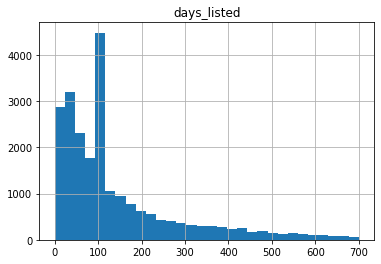

In [65]:
#apartment_data.hist(['days_listed'])
apartment_data.hist(column=['days_listed'],bins=30,range=(0,700))
apartment_data.describe()

In [66]:

apartment_data['bike_parking'].value_counts()

False    23649
True        50
Name: bike_parking, dtype: int64

### Conclusion


Dataframe:
Completed filling of values in the columns which had NaN values
bike_parking set to False
Days_listed set to median of days
ceiling_height set to median of ceilings
parks within 3000, ponds within 3000, balconies: set to 0

floors_total set to the floor number
locality_name set to previous value in the column

airport distance set to mean value of airport distances
city_center_distance set to mean value of city_center distances
park distance set to mean of park_distances
pond distance set to mean of pond_distances

Left NaNs as is in:
Kitchen area left as is (NaN)
Living area left as is (Nan)
#I had used the following. However its better to leave those as Nan because I don't think they are going to 
#impact the last_price
#apartment_data['kitchen_area'].fillna(apartment_data['total_area']/4, inplace = True)
#apartment_data['living_area'].fillna (apartment_data['total_area']/3, inplace = True)
Also, if I make them dependent on other columns, then when I change the total_area, I need to recalculate. So its better to leave them as NaNs.

All these missing values reported to data-entry and data-conversion so that in the future, such errors are avoided.
Its better to have cleaner, complete data so that data-scientist can enable better decision making.

In [49]:
# Reviewer's code

pd.Series(['FALSE', False, True]).astype('bool')

0     True
1    False
2     True
dtype: bool

In [50]:
print(len(apartment_data['locality_name'].unique())) #number of locality names
apartment_data['locality_name'].unique() #just to see how locality names look like, seem very unique

326


array(['Saint Petersburg', 'Shushary village', 'Yanino-1 village',
       'Pargolovo village', 'Murino village', 'Lomonosov', 'Sertolovo',
       'Petergof', 'Pushkin', 'Kudrovo village', 'Kommunar', 'Kolpino',
       'village Krasny Bor', 'Gatchina', 'village Fyodorovskoye',
       'Vyborg', 'Kronshtadt', 'Kirovsk', 'Novoye Devyatkino village',
       'Metallostroy village', 'Lebyazhye village', 'Siversky village',
       'Molodtsovo village', 'Kuzmolovsky village',
       'Novaya Ropsha village', 'Pavlovsk', 'Pikkolovo village',
       'Vsevolozhsk', 'Volkhov', 'Kingisepp', 'Priozersk', 'Sestroretsk',
       'Kuttuzi village', 'Annino village', 'Yefimovsky village',
       'Plodovoye village', 'Zaklinye village', 'Torkovichi village',
       'Pervomayskoye village', 'Krasnoye Selo', 'Pontonny village',
       'Syasstroy', 'Staraya village', 'Leskolovo village',
       'Novy Svet village', 'Slantsy', 'Putilovo village', 'Ivangorod',
       'Murino', 'Shlisselburg', 'Nikolskoye', 'Zele

In [51]:
columns_to_int ={'days_listed','last_price','balconies','floors_total','airport_dist','city_center_dist','park_dist', 'parks_within_3000','pond_dist', 'ponds_within_3000'}
for column_name in columns_to_int:
    try:
        apartment_data[column_name] = apartment_data[column_name].astype(int)
    except:
        print('Datatype cannot be changed for: ',column_name)
        
apartment_data['date_posted'] = pd.to_datetime(apartment_data['date_posted'])   
apartment_data['bike_parking'] = apartment_data['bike_parking'].astype('bool')


apartment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null datetime64[ns]
days_listed          23699 non-null int64
last_price           23699 non-null int64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            23699 non-null int64
ceiling_height       23699 non-null float64
floors_total         23699 non-null int64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         23699 non-null bool
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23699 non-null object
airport_dist         23699 non-null int64
city_center_dist     23699 non-null int64
park_dist            23699 non-null int64
parks_within_3000    23699 non-null int64
pond_dist            23699 non-null 

### Conclusion

Dataframe - apartment_data, Changed datatypes:

date_posted to datetime
bike_parking to boolean

Converted Float to Int for visual ease and data analysis:
We don't have price values with 5 decimal places given real estate transactions.
'days_listed','last_price','kitchen_area','living_area','total_area','balconies','ceiling_height','floors_total','airport_dist','city_center_dist','park_dist', 'parks_within_3000','pond_dist', 'ponds_within_3000'


### Step 3. Make calculations and add them to the table

In [52]:
#Make calculations and add the following entries to the table:
#the price per square meter
#the day of the week, month, and year that the ad was published
#which floor the apartment is on (first, last, or other)
#the ratio between the living space and the total area, as well as between the kitchen space and the total area.
#area calculations to be done after outlier handling

try:
    apartment_data['price_per_sqm'] = apartment_data['last_price'] / apartment_data['total_area'] 
    apartment_data['day_published']=apartment_data['date_posted'].dt.dayofweek
    apartment_data['month_published']=apartment_data['date_posted'].dt.month
    apartment_data['year_published'] = apartment_data['date_posted'].dt.year 
    apartment_data['living_to_total_ratio'] = apartment_data['living_area']/apartment_data['total_area']
    apartment_data['kitchen_to_total_ratio'] = apartment_data['kitchen_area']/apartment_data['total_area']
    apartment_data['city_center_dist_km'] = (apartment_data['city_center_dist']/1000).round(decimals=0)

except:
    print('error')
    

### Conclusion

Dataframe - apartment_data
Used try, except clause to add the following entries to the table:
#the price per square meter
#the day of the week, month, and year that the ad was published
#which floor the apartment is on (first, last, or other)

#the ratio between the living space and the total area, as well as between the kitchen space and the total area.

In [53]:
#categorizing the 'family_size' data

def categorize_floor(a,b):
    if  a ==1:
        return "first"
    elif a==b:
        return "last"
    else:
        return 'other'

apartment_data['floor_name'] = apartment_data.apply(lambda row: categorize_floor(row['floor'],row['floors_total']),axis=1)

#Use the map function to map the column in the pandas dataframe:
floor_codes = {'first':1, 'last':3 ,'other':2}

apartment_data['floor_code'] = apartment_data['floor_name'].map(floor_codes)
print(apartment_data['floor_name'].value_counts())
print(apartment_data['floor_code'].value_counts())
print(apartment_data['bike_parking'].value_counts())

other    17363
last      3419
first     2917
Name: floor_name, dtype: int64
2    17363
3     3419
1     2917
Name: floor_code, dtype: int64
True     20974
False     2725
Name: bike_parking, dtype: int64


### Conclusion

Dataframe - apartment_data
Defined floor_name first/last/other
Define floor_codes first:1/last:3/other:2
Checked to make sure all done correctly

### Step 4. Conduct exploratory data analysis and follow the instructions below:

#Carefully investigate the following parameters: square area, price, number of rooms, and ceiling height. 
#Examine the time it's taken to sell the apartment and plot a histogram. 
#Calculate the mean and median and explain the average time it usually takes to complete a sale. 
#When can a sale be considered to have happened rather quickly or taken an extra long time?
#Remove rare and outlying values and describe the patterns you've discovered.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91a27f6690>]],
      dtype=object)

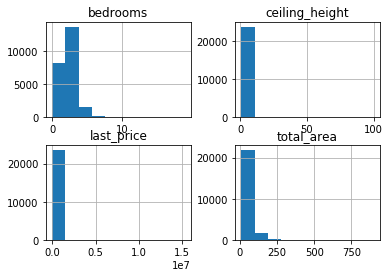

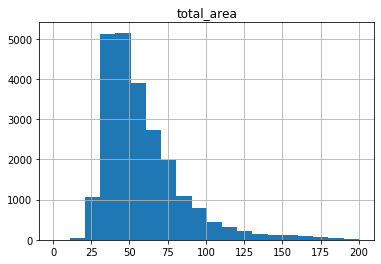

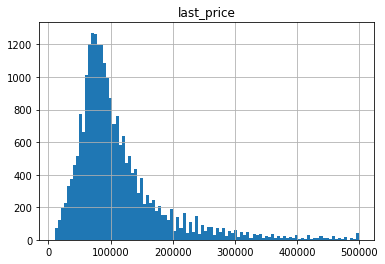

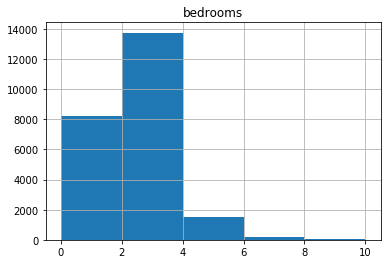

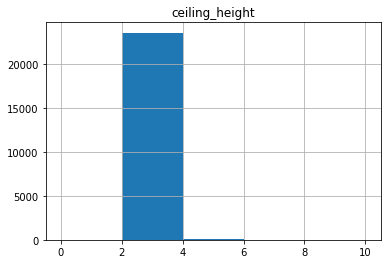

In [11]:
apartment_data.hist(column=['total_area','last_price','bedrooms','ceiling_height'])
apartment_data.hist(column=['total_area'],bins=20,range=(1,200))
apartment_data.hist(column=['last_price'],bins=100, range=(10000,500000))
apartment_data.hist(column=['bedrooms'],bins=5, range=(0,10))
apartment_data.hist(column=['ceiling_height'],bins=5,range=(0,10))
#apartment_data.hist(column=['total_area','last_price','bedrooms','ceiling_height'],bins=100)

### Conclusion

#Carefully investigated the following parameters: square area, price, number of rooms, and ceiling height. 
square area : most apartments have total area listed between 25-100, with peak around 40 sqm
price: most apartments have price in the range between 50K - 100k, with peak around 75k
bedrooms - most apartments have bedrooms between 2-4
ceiling height: most apartments have ceiling height between 2-4, thats also because I assigned the default ceiling height of 3
Details will become clearer as we do IQ ranges, and remove/substitute outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f919fa3ca10>]],
      dtype=object)

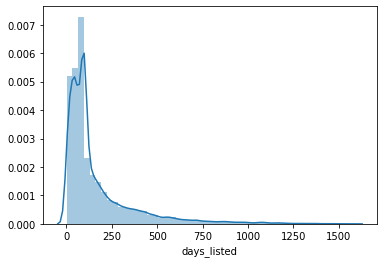

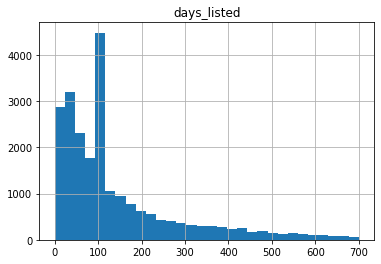

In [12]:
#Examine the time it's taken to sell the apartment and plot a histogram. 
sns.distplot(apartment_data['days_listed']);
apartment_data.hist(column=['days_listed'],bins=30,range=(0,700))

### Conclusion

#Carefully investigate the following parameters:days_listed
max apartments have days_listed around 40-60
after 500 days, the number of apartments left to be sold are very few (in 500s)

In [13]:
#Calculate the mean and median and explain the average time it usually takes to complete a sale. 
#When can a sale be considered to have happened rather quickly or taken an extra long time?
#Remove rare and outlying values and describe the patterns you've discovered.
apartment_data.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,...,pond_dist,ponds_within_3000,price_per_sqm,day_published,month_published,year_published,living_to_total_ratio,kitchen_to_total_ratio,city_center_dist_km,floor_code
count,23699.000000,2.369900e+04,23699.000000,21421.000000,21796.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,...,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,21796.000000,21421.000000,23699.000000,23699.000000
mean,169.360226,1.308310e+05,2.070636,10.569807,34.457852,60.348651,0.591080,2.724358,10.671463,5.892358,...,517.377062,0.590911,1988.433127,2.569307,6.400101,2017.367146,0.564766,0.187355,14.141778,2.021182
std,206.535633,2.177403e+05,1.078405,5.905438,22.030445,35.654083,0.959298,0.988298,6.595802,4.885249,...,172.182628,0.883999,1006.136035,1.789082,3.491561,1.039771,0.105368,0.072968,7.546887,0.516639
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,...,13.000000,0.000000,2.238532,0.000000,1.000000,2014.000000,0.021583,0.025381,0.000000,1.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.600000,5.000000,2.000000,...,517.000000,0.000000,1531.709403,1.000000,3.000000,2017.000000,0.495177,0.133333,11.000000,2.000000
50%,95.000000,9.300000e+04,2.000000,9.100000,30.000000,52.000000,0.000000,2.650000,9.000000,4.000000,...,517.000000,0.000000,1900.000000,3.000000,6.000000,2017.000000,0.567860,0.172414,14.000000,2.000000
75%,199.000000,1.360000e+05,3.000000,12.000000,42.300000,69.900000,1.000000,2.700000,16.000000,8.000000,...,517.000000,1.000000,2285.126529,4.000000,10.000000,2018.000000,0.637880,0.232416,15.000000,2.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,...,1344.000000,3.000000,38150.000000,6.000000,12.000000,2019.000000,1.000000,0.787879,66.000000,3.000000


In [14]:
apartment_data.skew()

days_listed                2.566171
last_price                25.804275
bedrooms                   1.524982
kitchen_area               4.209632
living_area                3.909430
total_area                 4.768597
balconies                  1.998248
ceiling_height            53.168887
floors_total               0.939520
floor                      1.553141
total_images               0.258593
bike_parking              -2.414030
is_studio                 12.493189
is_open_plan              18.728685
airport_dist               0.618055
city_center_dist           1.912312
park_dist                  4.661916
parks_within_3000          1.609565
pond_dist                  0.368690
ponds_within_3000          1.445458
price_per_sqm              8.078458
day_published              0.223297
month_published            0.060666
year_published            -0.519997
living_to_total_ratio     -0.137533
kitchen_to_total_ratio     1.237365
city_center_dist_km        1.917398
floor_code                 0

days_listed: Has outliers (max is around 5 years -- need to be removed)
last_price: has outliers (max is very high, need to remove or substitute with median)
All areas: have outliers
Balconies, Ceiling_height, floors_total,city_center_dist have outliers.

Skewness values (higher positive) show that most variables have extreme high values.

### Conclusion

#Carefully investigate the following parameters:days_listed
Mean : 160 days
Median : 74
Mean is more than double of Median. It means, distribution has long tail of high values. That implies more apartments have days listed more than 74.
From the histogram:
days_listed is maximum at around 50
Days_listed tapers down after 200 days. 
That means most apartments are listed for 200 days or less.

From IQR Range:
#When can a sale be considered to have happened rather quickly or taken an extra long time? 
IQ RANGE IS: 30-199 DAYS
QUICKLy: LESS THAN 30 DAYS, WITH THE QUICKEST OF 1 DAY 
EXTRA LONG TIME:MORE THAN 199 DAYS, WITH THE LATEST OF 1580 DAYS

I have calculated the IQ ranges for all columns to ease in identification of outliers.

<div style="background-color:#FFFF99;">
Days_listed NaN values were replaced by median which was 95 and it worked with the peak in Days_listed. The median, mean stay same.
</div>

In [15]:
name_stat = apartment_data.pivot_table(index=['locality_name'],values=['days_listed'])
print(name_stat)
print(apartment_data['days_listed'].skew())
print('total apartments with days listed > 1000: ',len(apartment_data.query('days_listed > 1000')))
print('total apartments with days listed > 400: ',len(apartment_data.query('days_listed > 400')))

print('total apartments with days listed > 600: ',len(apartment_data.query('days_listed > 600')))
print('total apartments with days listed <5: ',len(apartment_data.query('days_listed <5')))

print('total apartments with days listed <30: ',len(apartment_data.query('days_listed <30')))
apartment_stat = apartment_data.pivot_table(index=['days_listed'],aggfunc='size')
print (apartment_stat.head(10))
print (apartment_stat.tail(10))

                          days_listed
locality_name                        
Agalatovo village          191.500000
Aleksandrovskaya village    78.500000
Annino village             233.437500
Aro village                123.000000
Baryshevo village          252.500000
...                               ...
village Vazhiny             73.500000
village Veshchevo          173.000000
village Villozi            225.666667
village Vozrozhdeniye       89.000000
village Yam-Tesovo          82.500000

[326 rows x 1 columns]
2.566171196871519
total apartments with days listed > 1000:  276
total apartments with days listed > 400:  2637
total apartments with days listed > 600:  1198
total apartments with days listed <5:  338
total apartments with days listed <30:  3530
days_listed
1       1
2       3
3     158
4     176
5     152
6     124
7     234
8     139
9     143
10    127
dtype: int64
days_listed
1477    1
1484    1
1485    1
1489    1
1497    1
1512    2
1513    1
1553    1
1572    1
1580    

In [16]:
#Get IQR for each variable in the dataset
Q1 = apartment_data.quantile(0.25)
Q3 = apartment_data.quantile(0.75)
IQR = Q3 - Q1
fence_low = Q1 - IQR * 1.5
fence_high = Q3 + IQR * 1.5
print(IQR,fence_low, fence_high)

days_listed                 154.000000
last_price                68000.000000
bedrooms                      2.000000
kitchen_area                  5.000000
living_area                  23.700000
total_area                   29.900000
balconies                     1.000000
ceiling_height                0.100000
floors_total                 11.000000
floor                         6.000000
total_images                  8.000000
bike_parking                  0.000000
is_studio                     0.000000
is_open_plan                  0.000000
airport_dist              13144.000000
city_center_dist           4321.500000
park_dist                     0.000000
parks_within_3000             1.000000
pond_dist                     0.000000
ponds_within_3000             1.000000
price_per_sqm               753.417126
day_published                 3.000000
month_published               7.000000
year_published                1.000000
living_to_total_ratio         0.142703
kitchen_to_total_ratio   

In [17]:
def check_outlier(df_in, col_name):
    #THE IQR formula removes a lot of records from the dataframe. Hence I used percentile for removal
    #Not using this method since I decided to not remove outliers, instead substitute them

    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    whisker_low  = q1-1.5*iqr
    whisker_high = q3+1.5*iqr
    df_outliers = df_in[(df_in[col_name] < whisker_low) | (df_in[col_name] > whisker_high)]
    print(col_name, ':', len(df_outliers))

def remove_outlier(df_in):
    #THE IQR formula removes a lot of records from the dataframe. Hence I used percentile for removal
    #Not using this method since I decided to not remove outliers, instead substitute them
    
    days_whisker = fence_high['days_listed']
    price_whisker = fence_high['last_price']
    ceiling_whisker = fence_high['ceiling_height']
    print(len(df_in))
    df_out = df_in.query(
                    'days_listed <= @days_whisker or last_price <= @price_whisker or ceiling_height <= @ceiling_whisker'
                        )
    
    df_outliers = df_in.query(
                'days_listed > @days_whisker and last_price > @price_whisker and ceiling_height > @ceiling_whisker'
                        )
    
    print('count of combined outliers - days_listed, last_price and ceiling height:', len(df_outliers))
    print('count of records after combined outliers removed:',len(df_out))
    return df_out

#THE IQR formula removes a lot of records from the dataframe. Hence I used percentile for removal
    #Not using this method since I decided to not remove outliers, instead substitute them

def replace_outlier_with_percentile(df_in,col_name):
    q_low = df_in[col_name].quantile(0.01)
    q_hi  = df_in[col_name].quantile(0.99)
    
    df = df_in
    
    print(df[col_name].skew())
    df[col_name] = np.where(df[col_name] <=fence_low[col_name], q_low[col_name],df[col_name])
    df[col_name] = np.where(df[col_name] >=fence_high[col_name], q_hi[col_name],df[col_name])
    df[col_name] = np.where(df[col_name] <=q_low, q_low[col_name],df[col_name])
    df[col_name] = np.where(df[col_name] >q_hi, q_hi[col_name],df[col_name])

    print(df[col_name].skew())

    return df

def replace_outlier_with_median(df_in, col_name):
    df_out = df_in
    df_out[col_name] = np.where(df_in[col_name] > df_in[col_name].quantile(0.99), df_in[col_name].median(), df_in[col_name])
    return df_out

check_outlier(apartment_data,'days_listed')
check_outlier(apartment_data,'last_price')
check_outlier(apartment_data,'total_area')
check_outlier(apartment_data,'ceiling_height')

apartment_data = remove_outlier(apartment_data)

#col_outliers=['days_listed','kitchen_area','living_area','total_area','last_price']
#apartment_data = replace_outlier_with_percentile(apartment_data, col_outliers)

#replace outlier ceiling height with median, outlier for bedrooms with median
#col_outliers=['city_center_dist','ceiling_height','bedrooms','park_dist','ponds_within_3000','balconies']
#apartment_data = replace_outlier_with_median(apartment_data,col_outliers)

apartment_data.describe()

days_listed : 2324
last_price : 2034
total_area : 1240
ceiling_height : 2957
23699
count of combined outliers - days_listed, last_price and ceiling height: 165
count of records after combined outliers removed: 23534


,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,...,pond_dist,ponds_within_3000,price_per_sqm,day_published,month_published,year_published,living_to_total_ratio,kitchen_to_total_ratio,city_center_dist_km,floor_code
count,23534.000000,2.353400e+04,23534.000000,21271.000000,21645.000000,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,...,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,21645.000000,21271.000000,23534.000000,23534.000000
mean,165.336152,1.276272e+05,2.058511,10.484967,34.098286,59.728004,0.591867,2.720155,10.694230,5.900867,...,517.929846,0.585238,1975.522515,2.571174,6.397722,2017.377836,0.564696,0.187479,14.198819,2.020354
std,200.353237,2.100974e+05,1.061337,5.710183,21.323614,34.471078,0.959709,0.989868,6.604834,4.893415,...,171.803318,0.879192,981.640175,1.790881,3.490213,1.032187,0.105233,0.072709,7.530046,0.516882
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,...,13.000000,0.000000,2.238532,0.000000,1.000000,2014.000000,0.021583,0.025381,0.000000,1.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.600000,5.000000,2.000000,...,517.000000,0.000000,1527.895792,1.000000,3.000000,2017.000000,0.495082,0.133333,11.000000,2.000000
50%,95.000000,9.200000e+04,2.000000,9.100000,30.000000,52.000000,0.000000,2.650000,9.000000,4.000000,...,517.000000,0.000000,1896.103896,3.000000,6.000000,2017.000000,0.567797,0.172414,14.000000,2.000000
75%,194.000000,1.340000e+05,3.000000,12.000000,42.000000,69.000000,1.000000,2.700000,16.000000,8.000000,...,517.000000,1.000000,2276.242450,4.000000,10.000000,2018.000000,0.637624,0.232558,15.000000,2.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,...,1344.000000,3.000000,38150.000000,6.000000,12.000000,2019.000000,1.000000,0.787879,66.000000,3.000000


In [18]:
#do calculations for areas after outlier handling


try:
    apartment_data['price_per_sqm'] = apartment_data['last_price'] / apartment_data['total_area'] 
    apartment_data['living_to_total_ratio'] = apartment_data['living_area']/apartment_data['total_area']
    apartment_data['kitchen_to_total_ratio'] = apartment_data['kitchen_area']/apartment_data['total_area']

except:
    print('error')
    

In [19]:
apartment_data.skew()

days_listed                2.606313
last_price                28.207158
bedrooms                   1.424541
kitchen_area               4.147727
living_area                3.943024
total_area                 4.899166
balconies                  1.996442
ceiling_height            53.295194
floors_total               0.933639
floor                      1.548875
total_images               0.260040
bike_parking              -2.421926
is_studio                 12.491586
is_open_plan              18.662824
airport_dist               0.614384
city_center_dist           1.928318
park_dist                  4.682019
parks_within_3000          1.620997
pond_dist                  0.380297
ponds_within_3000          1.457787
price_per_sqm              8.426761
day_published              0.222248
month_published            0.061603
year_published            -0.514551
living_to_total_ratio     -0.132311
kitchen_to_total_ratio     1.232200
city_center_dist_km        1.933578
floor_code                 0

In [20]:
apartment_data.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,...,pond_dist,ponds_within_3000,price_per_sqm,day_published,month_published,year_published,living_to_total_ratio,kitchen_to_total_ratio,city_center_dist_km,floor_code
count,23534.000000,2.353400e+04,23534.000000,21271.000000,21645.000000,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,...,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,21645.000000,21271.000000,23534.000000,23534.000000
mean,165.336152,1.276272e+05,2.058511,10.484967,34.098286,59.728004,0.591867,2.720155,10.694230,5.900867,...,517.929846,0.585238,1975.522515,2.571174,6.397722,2017.377836,0.564696,0.187479,14.198819,2.020354
std,200.353237,2.100974e+05,1.061337,5.710183,21.323614,34.471078,0.959709,0.989868,6.604834,4.893415,...,171.803318,0.879192,981.640175,1.790881,3.490213,1.032187,0.105233,0.072709,7.530046,0.516882
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,...,13.000000,0.000000,2.238532,0.000000,1.000000,2014.000000,0.021583,0.025381,0.000000,1.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.600000,5.000000,2.000000,...,517.000000,0.000000,1527.895792,1.000000,3.000000,2017.000000,0.495082,0.133333,11.000000,2.000000
50%,95.000000,9.200000e+04,2.000000,9.100000,30.000000,52.000000,0.000000,2.650000,9.000000,4.000000,...,517.000000,0.000000,1896.103896,3.000000,6.000000,2017.000000,0.567797,0.172414,14.000000,2.000000
75%,194.000000,1.340000e+05,3.000000,12.000000,42.000000,69.000000,1.000000,2.700000,16.000000,8.000000,...,517.000000,1.000000,2276.242450,4.000000,10.000000,2018.000000,0.637624,0.232558,15.000000,2.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,...,1344.000000,3.000000,38150.000000,6.000000,12.000000,2019.000000,1.000000,0.787879,66.000000,3.000000


Step 5. Overall conclusion

Skew values much much better after outlier handling.
The column values and IQR ranges depict the changes after outlier handling.
We can now proceed with Data Analysis and Decision making

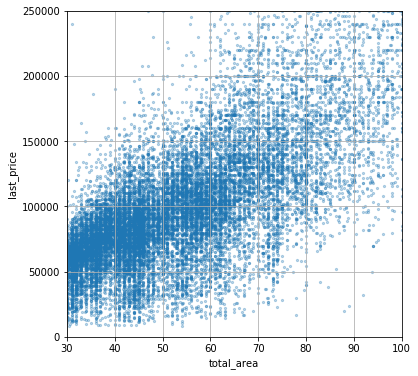

In [21]:
#scatter plot total_area/saleprice
var = 'total_area'
apartment_data.plot.scatter(x='total_area', y='last_price', s=5,xlim=(30,100),ylim=(0,250000),alpha=0.3,grid=True, figsize=(6,6));

#Carefully investigate the scatter plot : total_area vs last_price

Total_area has a positive correlation with last_price
More the total area, more the last_price
Most apartments sold are in the 30-100sqm range.

In [22]:
apartment_data['last_price'].corr(apartment_data['total_area'])

0.6414539670706106

There is a strong correlation between Last_price and total_area. The Correlation Coefficient is 0.82

<div style="background-color:#FFFF99;">
Added code for .corr between last_price and total_area, and added conclusion. Strong correlation.
</div>

In [23]:
#bar chart plot bedrooms/saleprice
#apartment_data.plot.bar(x='bedrooms', y='last_price');

0.3522483225627791

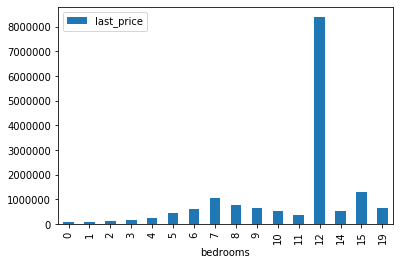

In [24]:
(apartment_data
                .pivot_table(index='bedrooms',values='last_price')
                .plot(kind='bar') )
apartment_data['last_price'].corr(apartment_data['bedrooms'])

#Carefully investigate the scatter plot : bedrooms vs last_price

0 bedrooms (studio) sell for upto 160K
1-3 bedrooms sell from 10K - 300K+
5+ bedrooms sell for higher price starting at 90K+
Positive relationship, higher price for more rooms
Strong correlation. Correlation coefficient is 0.52

<div style="background-color:#FFFF99;">
Added code for .corr between last_price and bedrooms, and added conclusion. Strong correlation.
</div>

0.058099251119807516

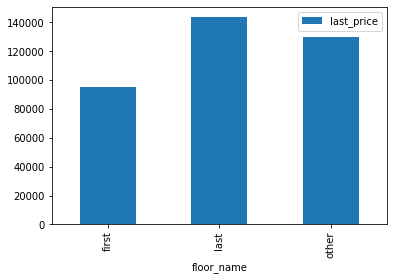

In [25]:
#scatter plot floor/saleprice
(apartment_data
                .pivot_table(index='floor_name',values='last_price')
                .plot(kind='bar') )
apartment_data['last_price'].corr(apartment_data['floor_code'])

### Carefully investigate the scatter plot : last_price vs floor_code

No relationship.
All floor levels related to same days_listed.
.corr method shows the value of 0.069. No correlation.

<div style="background-color:#FFFF99;">
Added bar graph and code for .corr between last_price and floor_code, and added conclusion. Strong correlation.
</div>

-0.19184718792781663

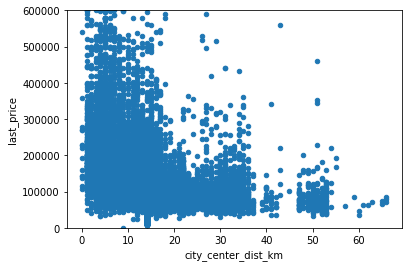

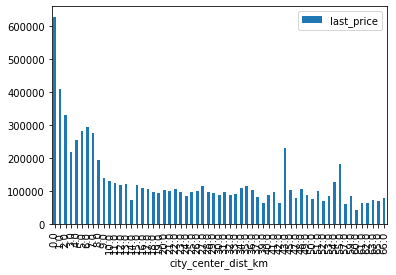

In [26]:
#scatter plot last_price/city_center_dist
apartment_data.plot.scatter(x='city_center_dist_km', y='last_price',ylim=(0,600000));
apartment_data.pivot_table(index='city_center_dist_km',values='last_price').plot(kind='bar')
apartment_data['last_price'].corr(apartment_data['city_center_dist_km'])

### Carefully investigate the scatter plot : last_price, city_center_dist
Negative correlation between last_price and city_center_dist (-0.38)
Nearer the apartment to the city_center (less city_center_dist), higher the last_price and viceversa.

<div style="background-color:#FFFF99;">
Added bar graph and code for .corr between last_price and city_center_dist_km. Negative correlation.
</div>

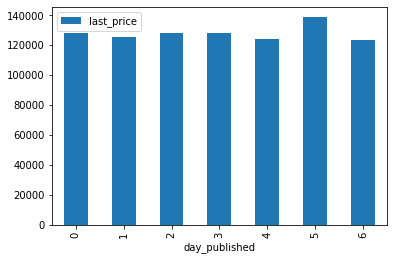

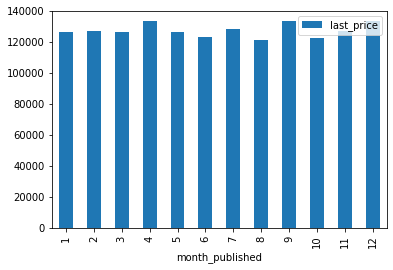

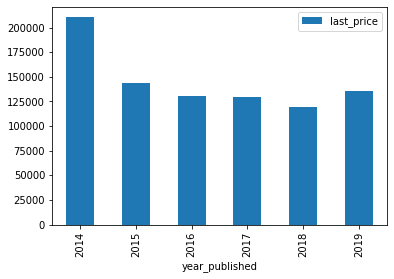

In [27]:
#scatter plot day,month, year published/saleprice
(apartment_data
                .pivot_table(index='day_published',values='last_price')
                .plot(kind='bar') )

(apartment_data
                .pivot_table(index='month_published',values='last_price')
                .plot(kind='bar') )

(apartment_data
                .pivot_table(index='year_published',values='last_price')
                .plot(kind='bar') )

In [28]:
#correlation coefficient day,month, year published/saleprice
(print('corr day_published',apartment_data['last_price'].corr(apartment_data['day_published']),
    'month',apartment_data['last_price'].corr(apartment_data['month_published']),
    'year',apartment_data['last_price'].corr(apartment_data['year_published'])))

corr day_published 0.0019384514479213297 month 0.0010292212532616455 year -0.0199486308990753


### Carefully investigate the scatter plot : year, month, day published to last_price

I don't see any correlation between year, month, day published to the last_price. 
Only conclusion is that in 2014, fewer homes were sold.

<div style="background-color:#FFFF99;">
Added bar graph and code for .corr between last_price and day,month, year. No correlation.
</div>

Select the 10 localities with the largest number of ads then calculate the average price per square meter in these localities. Determine which ones have the highest and lowest housing prices. You can find this data by name in the ’locality_name’ column.

In [29]:
#localities_top_stat_1 =  ( apartment_data
#                        .pivot_table(index='locality_name',aggfunc=['size']).sort_values(by=['size'],ascending=False)
#                        .head(10)
#                     )

localities_top_stat=apartment_data.pivot_table(index='locality_name',values='price_per_sqm',aggfunc=['count','mean'])

localities_top_stat.columns=['count','average_price']

localities_top_stat = localities_top_stat.sort_values(by=['count'],ascending=False).head(10)

print(localities_top_stat)
print(localities_top_stat['average_price'].max())
print(localities_top_stat['average_price'].min())

                   count  average_price
locality_name                          
Saint Petersburg   15595    2279.973219
Murino village       556    1713.635239
Shushary village     441    1574.660593
Vsevolozhsk          399    1374.747134
Pushkin              368    2053.928450
Kolpino              338    1508.491516
Pargolovo village    327    1803.518265
Gatchina             307    1374.922923
Kudrovo village      301    1849.187765
Vyborg               237    1162.838183
2279.9732189485903
1162.8381830663723


### Conclusion

Top 10 localities are listed above (that have the highest ads)
Saint Petersburg has the highest price per sqm which is 2306.04
Vyborg has the lowest price per sqm which is 1165.92

Thoroughly look at apartment offers: Each apartment has information about the distance to the city center. Select apartments in Saint Petersburg (‘locality_name’). Your task is to pinpoint which area is considered to be in the city center. In order to do that, create a column with the distance to the city center in km and round to the nearest whole number. Next, calculate the average price for each kilometer and plot a graph to display how prices are affected by the distance to the city center. Find a place on the graph where it shifts significantly. That's the city center border.

In [30]:

apartment_data_stp = apartment_data.query('locality_name == "Saint Petersburg"')

#Get the apartments categorized by city_center_distance, with number of apartments and average price for each distance
tmp_data_stp = apartment_data_stp.pivot_table(index='city_center_dist_km',values='last_price',aggfunc=['count','mean'])
tmp_data_stp.columns=['apartments','average_price']  #rename columns
print(tmp_data_stp)

                     apartments  average_price
city_center_dist_km                           
0.0                          26  628173.923077
1.0                         180  407758.933333
2.0                         294  329203.136054
3.0                         341  218467.058651
4.0                         659  255246.089530
5.0                         900  281824.905556
6.0                         601  292441.742097
7.0                         404  274148.012376
8.0                         586  194544.912969
9.0                         595  138161.023529
10.0                        718  129039.792479
11.0                       1173  124357.579710
12.0                       1605  116477.436760
13.0                       1457  121662.816747
14.0                       1344  120810.603423
15.0                       1566  117172.288633
16.0                       1265  107462.611067
17.0                        887  104218.804961
18.0                        261  101826.624521
19.0         

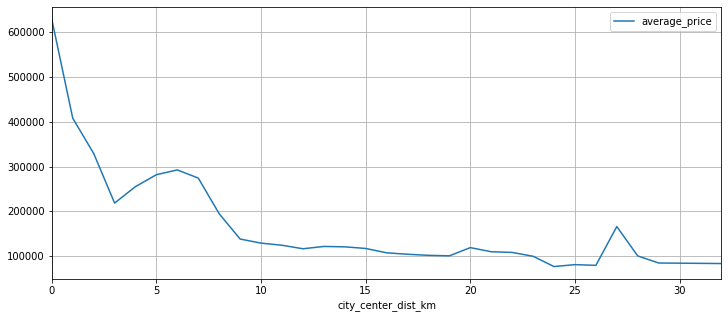

In [31]:
tmp_data_stp.plot(y='average_price',grid=True, figsize=(12,5))

In [32]:
#get the inside city border apartments (average price per sqkm is < 155000)

apartments_in_city_center = apartment_data.query('city_center_dist_km < 6  ')
apartment_data_stp_border_stat= apartments_in_city_center.pivot_table(index='city_center_dist_km',values='last_price')
apartment_data_stp_border_stat

,last_price
city_center_dist_km,
0.0,628173.923077
1.0,407758.933333
2.0,329203.136054
3.0,218467.058651
4.0,254857.188253
5.0,281643.079911


### Conclusion

Saint Petersburg (‘locality_name’) - city center border.
The border is around after 5km. This is depicted in the graph above and also based on the calculations

1. I calculated price_per_sq_km, and city_dist_km.
2. Then I used the pivot table to categorize values of city_center_distance, with average calculation of price.
3. Then, I filtered the values for average price less than 150000.
4. This showed continuous steep curve starting at around 6km (after 5KM)
5. The price continuously goes down after that with some outliers - 
5.0km, ,175643.458072 price 
20.0km, 119029 price 
6. After 6KM, the price continuously goes down, At 7KM it goes steeply down.

<div style="background-color:#FFFF99;">
Updated code, the distance threshold where the prices start going lower are after 6KM. Updated the Conclusion.
</div>

Select all the apartments in the city center and examine correlations between the following parameters: total area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price: number of rooms, floor, distance to the city center, and ad publication date. Draw your conclusions. Are they different from the overall deductions about the entire city?

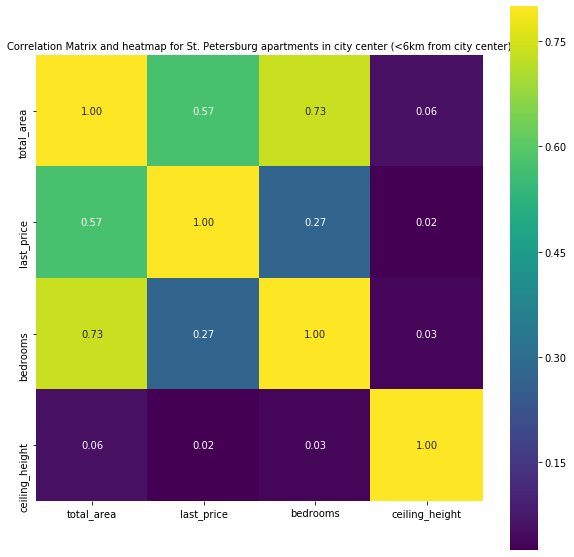

In [33]:
#correlation matrix for St. Petersburg
#Select all the apartments in the city center of St. Petersburg and examine correlations between the following parameters: 
#total area, price, number of rooms, ceiling height.
df_corr_city  = apartments_in_city_center [['total_area','last_price','bedrooms','ceiling_height']]
corr_city = df_corr_city.corr()

f, ax = plt.subplots(figsize=(10, 10))
plt.title('Correlation Matrix and heatmap for St. Petersburg apartments in city center (<6km from city center)', fontsize=10);
sns.heatmap(corr_city,annot=True,fmt=".2f",square=True,vmax=.8,ax=ax,cmap='viridis');

<div style="background-color:#FFFF99;">
Updated the graph with the dataframe values for St. Petersburg apartments which fall within the border of 6km from city_center
</div>

In [34]:
corr_city.unstack().sort_values().drop_duplicates()

last_price  ceiling_height    0.024818
bedrooms    ceiling_height    0.034995
total_area  ceiling_height    0.057856
last_price  bedrooms          0.274680
total_area  last_price        0.574039
            bedrooms          0.734811
            total_area        1.000000
dtype: float64

As you see from the heatmap showing correlation matrix and also the strongest correlations:

    Total area and bedrooms.
    Total area and last_price.
    Last_price and bedrooms .

These are the strongest correlations

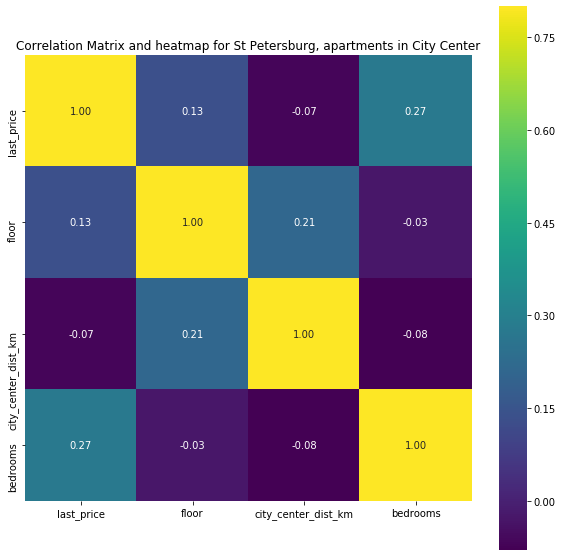

In [35]:
#correlation matrix
#Also identify the factors for entire city that affect an apartment’s price: 
#    number of rooms, floor, distance to the city center, and ad publication date.
df_corr_city2  = apartments_in_city_center [['last_price','floor','city_center_dist_km','bedrooms','date_posted']]
corr_city2 = df_corr_city2.corr()

f, ax = plt.subplots(figsize=(10, 10))
plt.title('Correlation Matrix and heatmap for St Petersburg, apartments in City Center', fontsize=12);
sns.heatmap(corr_city2,annot=True,fmt=".2f",square=True,vmax=.8,ax=ax,cmap='viridis');

In [36]:
corr_city2.unstack().sort_values().drop_duplicates()

city_center_dist_km  bedrooms              -0.079514
last_price           city_center_dist_km   -0.066140
floor                bedrooms              -0.025084
last_price           floor                  0.133778
floor                city_center_dist_km    0.211543
last_price           bedrooms               0.274680
                     last_price             1.000000
dtype: float64

As you see from the heatmap showing correlation matrix and also the strongest correlations:
    
    Last_price and bedrooms 
    These are the strongest correlations

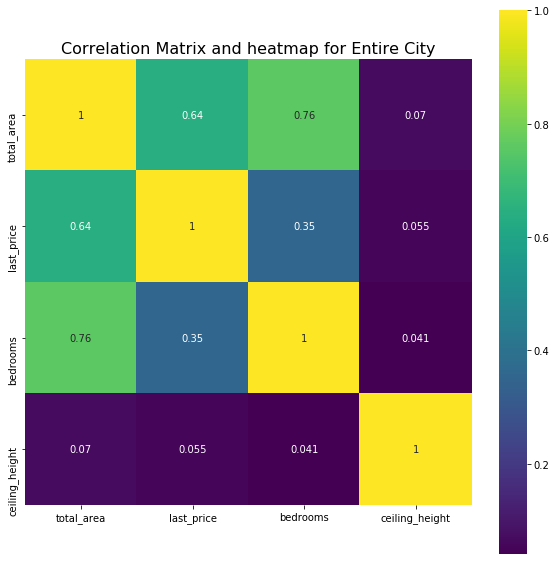

In [37]:
df_corr_entire_city = apartment_data[['total_area','last_price','bedrooms','ceiling_height']]
corr_entire_city = df_corr_entire_city.corr()
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Correlation Matrix and heatmap for Entire City', fontsize=16)
sns.heatmap(corr_entire_city,annot=True,square=True,cmap='viridis');

In [38]:
corr_entire_city.unstack().sort_values().drop_duplicates()

bedrooms    ceiling_height    0.041149
last_price  ceiling_height    0.055341
total_area  ceiling_height    0.069998
last_price  bedrooms          0.352248
total_area  last_price        0.641454
            bedrooms          0.756717
            total_area        1.000000
dtype: float64

As you see from the heatmap showing correlation matrix and also the strongest correlations:

    Total area and bedrooms .
    Total area and last_price .
    Last_price and bedrooms .
    last_price and ceiling height.
    These are the strongest correlations

The correlation matrix for St. Petersburg city and also Entire city has the same strong correlations 
Total area - bedrooms, Total area - last price, and last_price - bedrooms

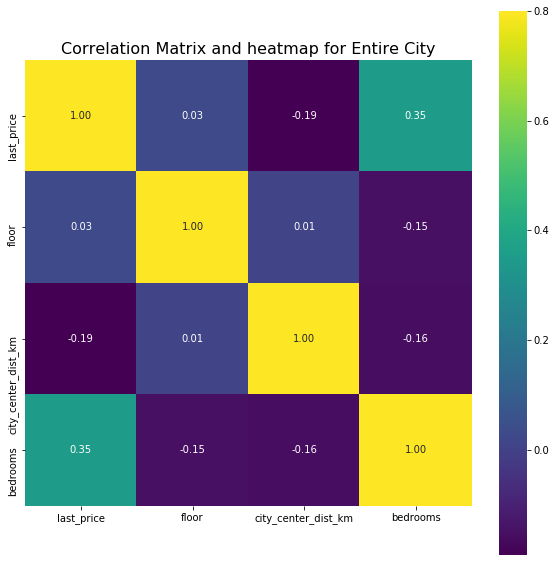

In [39]:
#correlation matrix
#Also identify the factors that affect an apartment’s price: 
#    number of rooms, floor, distance to the city center, and ad publication date.
df_corr_entire_city2  = apartment_data[['last_price','floor','city_center_dist_km','bedrooms','date_posted']]
corr_entire_city2 = df_corr_entire_city2.corr()

f, ax = plt.subplots(figsize=(10, 10))
plt.title('Correlation Matrix and heatmap for Entire City', fontsize=16);
sns.heatmap(corr_entire_city2,annot=True,fmt=".2f",square=True,vmax=.8,ax=ax,cmap='viridis');

In [40]:
corr_entire_city2.unstack().sort_values().drop_duplicates()

last_price           city_center_dist_km   -0.191847
city_center_dist_km  bedrooms              -0.157522
floor                bedrooms              -0.150642
                     city_center_dist_km    0.006045
last_price           floor                  0.031443
                     bedrooms               0.352248
                     last_price             1.000000
dtype: float64

#### As you see from the heatmap showing correlation matrix and also the strongest correlations:
    
    Last_price and bedrooms 
    last price is inversely related with city_center_distance. Shorter the distance, higher the price and vice-versa.
    These are the strongest correlations

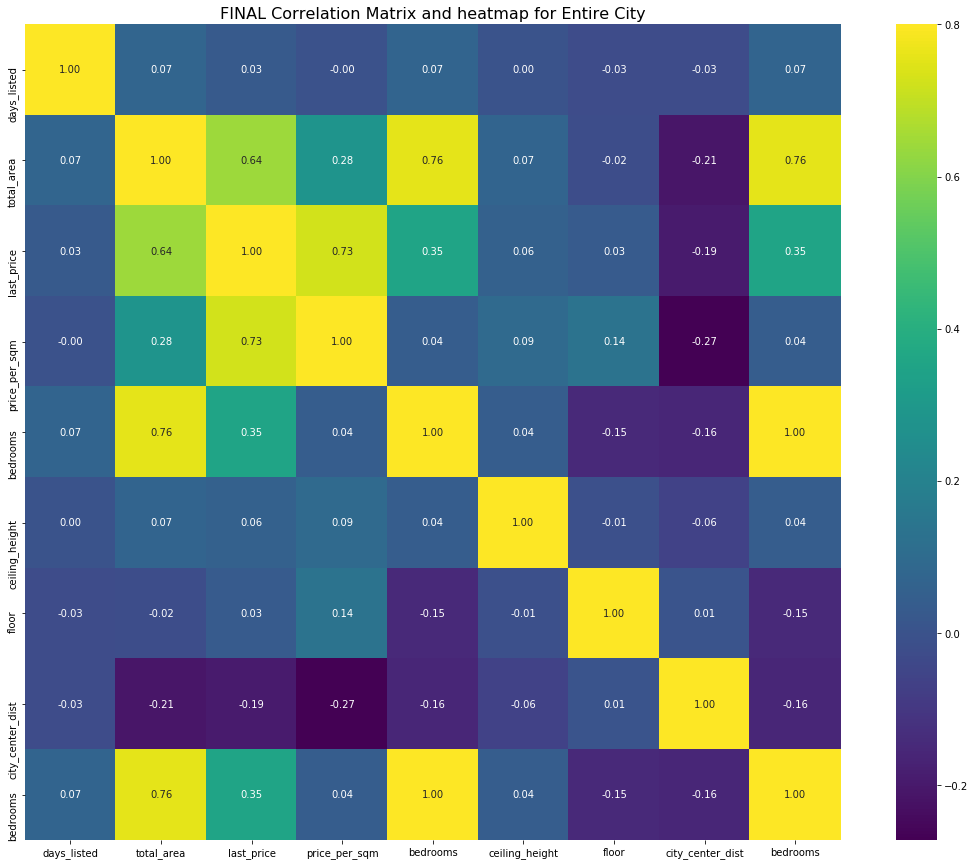

In [41]:
#saleprice correlation matrix
f, ax = plt.subplots(figsize= [20,15])
final_df = apartment_data[['days_listed','total_area','last_price','price_per_sqm','bedrooms','ceiling_height',
                           'floor','city_center_dist','bedrooms','date_posted']]
corr_final = final_df.corr()
plt.title('FINAL Correlation Matrix and heatmap for Entire City', fontsize=16);
sns.heatmap(corr_final,annot=True,fmt=".2f",square=True,vmax=.8,ax=ax,cmap='viridis');

In [42]:
corr_final.unstack().sort_values().drop_duplicates()

price_per_sqm     city_center_dist   -0.272321
city_center_dist  total_area         -0.210080
last_price        city_center_dist   -0.193313
bedrooms          city_center_dist   -0.159158
                  floor              -0.150642
city_center_dist  ceiling_height     -0.061548
days_listed       floor              -0.025362
city_center_dist  days_listed        -0.025329
floor             total_area         -0.021075
                  ceiling_height     -0.011500
days_listed       price_per_sqm      -0.001175
ceiling_height    days_listed         0.001433
floor             city_center_dist    0.005533
last_price        days_listed         0.028637
floor             last_price          0.031443
bedrooms          price_per_sqm       0.040388
ceiling_height    bedrooms            0.041149
last_price        ceiling_height      0.055341
total_area        ceiling_height      0.069998
bedrooms          days_listed         0.070769
total_area        days_listed         0.073511
price_per_sqm

As you see from the heatmap showing correlation matrix and also the strongest correlations:
    
   *positive correlation:
   last_price and bedrooms,
   last_price and total_area,
   total_area and bedrooms,
   last_price and ceiling height.
   
   *negative (or nearly negative) correlation:
   price_per_sqm and city_center_dist  (more city_center_dist, less price_per_sqm)
   last_price and city_center_dist (more city_center_dist, less last_price)

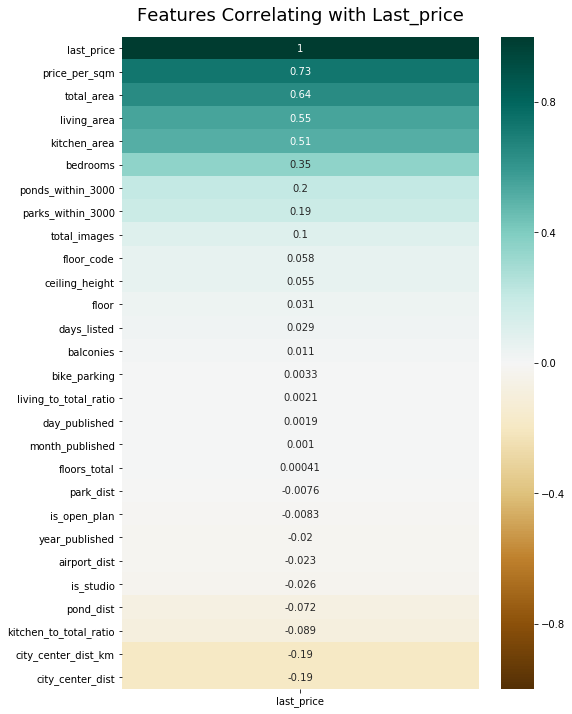

In [43]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(apartment_data.corr()[['last_price']].sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Last_price', fontdict={'fontsize':18}, pad=16);

As you see from the heatmap showing correlation matrix and also the strongest correlations:
    
   Above linear heatmap shows 
   Last_price has strong positive correlation with total_area, living_area, kitchen_area,  bedrooms, ceiling height, parks_within_3000, ponds_within_3000
   Last_price has strong negative correlation with city_center_dist. 
   

### Conclusion

Overall conclusion:

1. 
 positive correlation:
   last_price and bedrooms, parks_within_3000, ponds_within_3000
   total_area and price_per_sqm,
   
 negative (or nearly negative) correlation:
   price_per_sqm and city_center_dist  (more city_center_dist, less price_per_sqm),
   last_price and city_center_dist (more city_center_dist, less last_price),
   days_listed and total_area (More total_area, less days listed).

2. The factors that affected a certain city (St. Petersburg locality) also affected the entire city. 

3. Many values were missing from the dataframe that were filled. 165 records were dropped which had outliers in all three columns - days_listed, ceiling_height and last_price.
4. I decided to not pursue replacement of outliers with median values to highlight the issues. Commented the code for following because I decided not to substitute values in individual outlier columns:
#Many columns had outliers that were removed / substituted by different methods:
#Some columns with outliers - records were removed,
#Some columns with outliers - values were substituted with median,
#Overall, the exercise was to bring the skew() factor between -1 and 1.
5. All the missing values and removed records for outliers reported to the Data Ingestion and also conversion team. GIGO - "Garbage In, Garbage Out". Although I tried to guestimate, and substitute to analyze the data as carefully I could. There is no substitute for clean data. It makes the analysis cleaner and powerful.
6. Thankyou for this project. 

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [X]  files explored (first rows printed, info() method)
- [X]  missing values determined
- [X]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [X]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [X]  calculated and added to the table: the price per square meter
- [X]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [X]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [X]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [x]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [X]  histograms for each parameter created
- [x]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [x]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [x]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square meter in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [x]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [x]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn